Only two samples supplied. Realistically, homograph will need to be used in order to test this algorithm with other kartu keluarga

In [3]:
import fitz
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\paoma\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pdf_name = "karkel1.pdf"

doc = fitz.open(pdf_name)

for page in doc:
    pix = page.get_pixmap(dpi=600)
    name = pdf_name[:-4] + "-page-" + str(page.number) + ".png"
    pix.save(name)

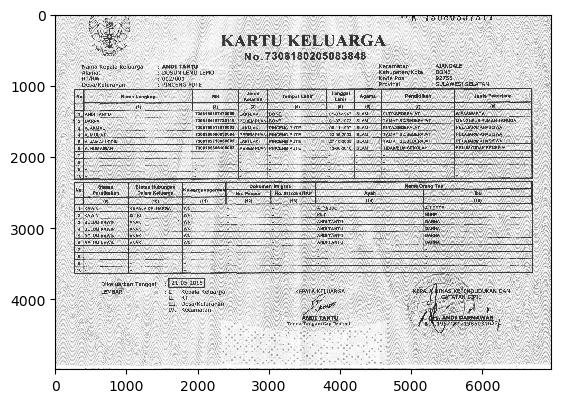

In [5]:
filename = "karkel1-page-0.png"

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

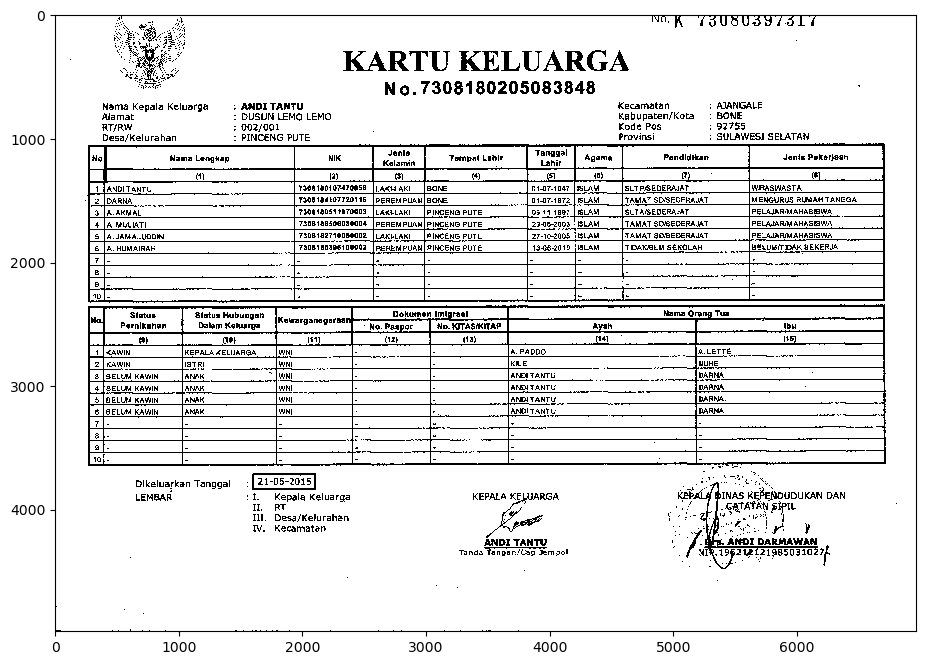

In [6]:
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(30, 8))
plt.imshow(img, cmap="gray")

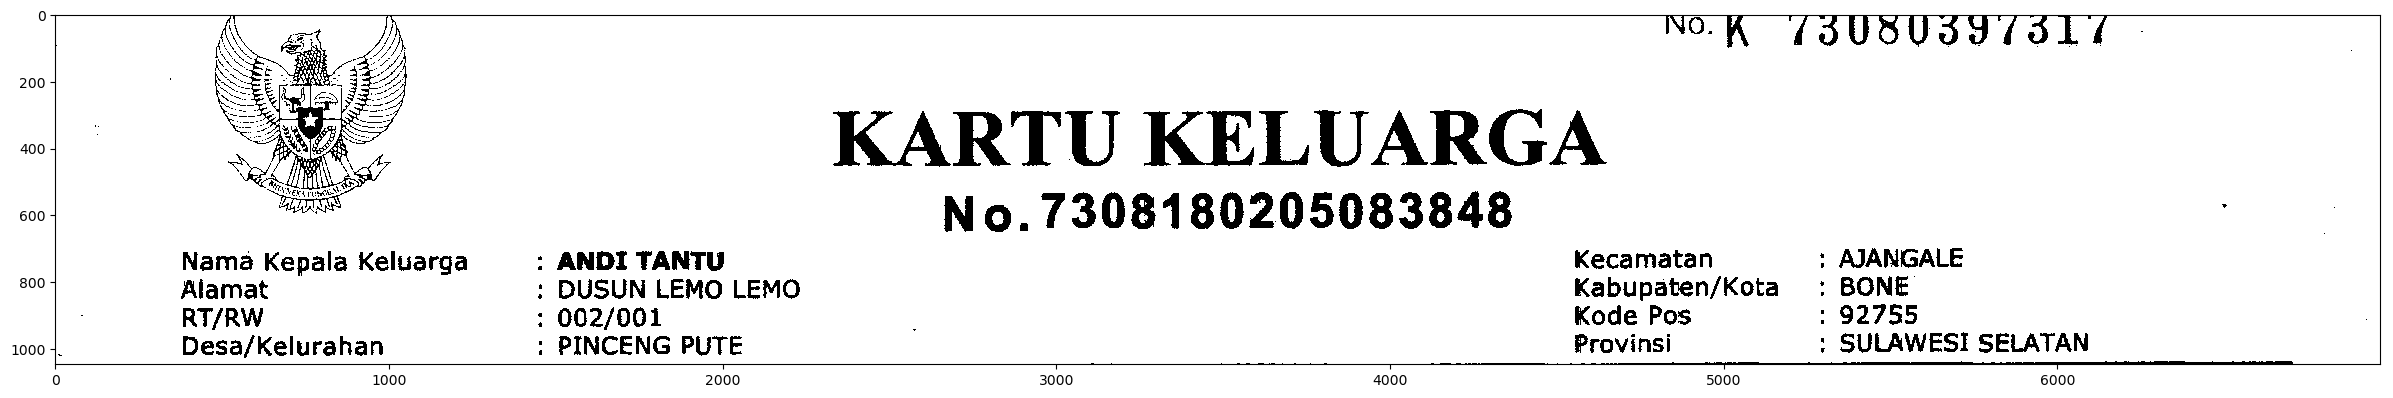

In [7]:
c1 = img[:round(img.shape[0]*0.21),:]
c2 = img[round(img.shape[0]*0.27):round(img.shape[0]*0.47),:]
c3 = img[round(img.shape[0]*0.54):round(img.shape[0]*0.77),:]

plt.figure(figsize=(30, 8))
plt.imshow(c1, cmap="gray")

In [8]:
def model(image):
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

In [9]:
c1 = cv2.cvtColor(c1, cv2.COLOR_GRAY2BGR)

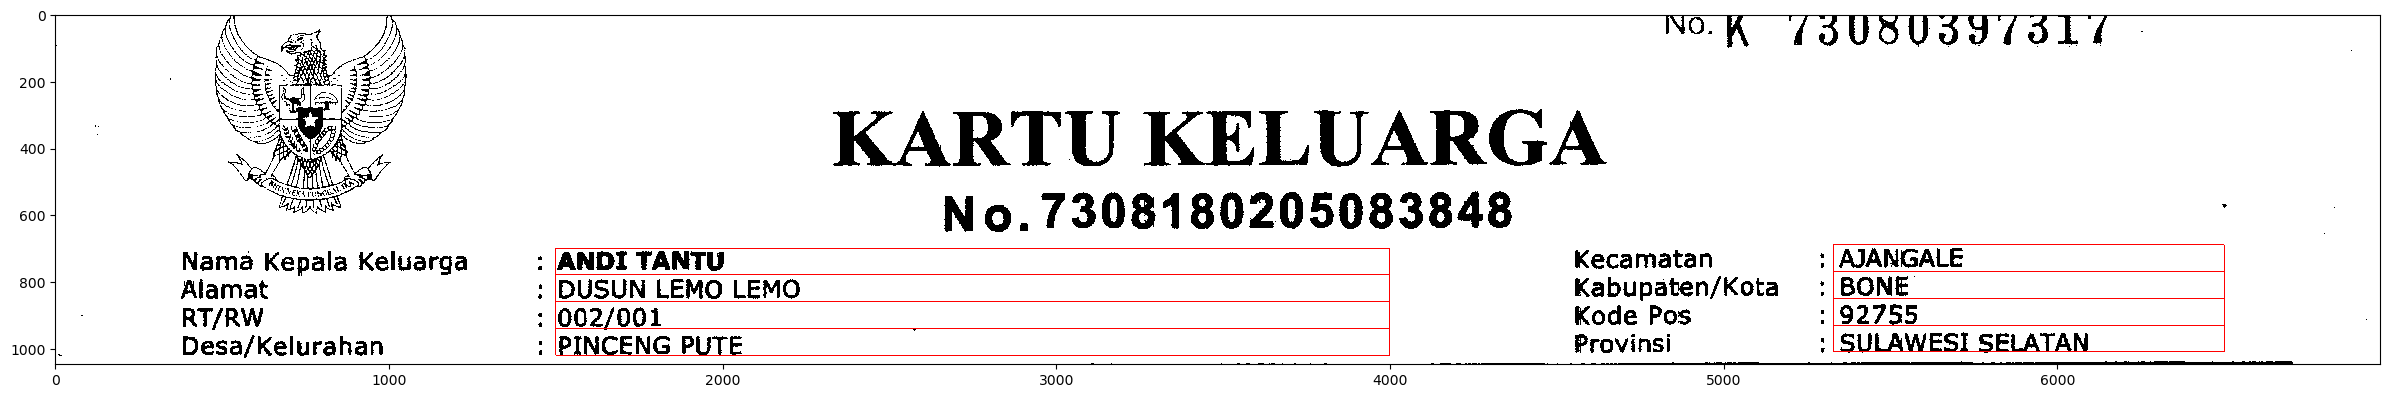

In [10]:
c1_draw = c1.copy()

# x1, x2, y1, y2
c1_coords = [(1500, 4000, 700, 780),
             (1500, 4000, 780, 860),
             (1500, 4000, 860, 940),
             (1500, 4000, 940, 1020),
             (5330, 6500, 690, 770),
             (5330, 6500, 770, 850),
             (5330, 6500, 850, 930),
             (5330, 6500, 930, 1010)]
texts = []

for c in c1_coords:
    # texts.append(model(c1[c[2]:c[3], c[0]:c[1]]))
    cv2.rectangle(c1_draw, (c[0], c[2]), (c[1], c[3]), (255, 0, 0), 2)

plt.figure(figsize=(30, 8))
plt.imshow(c1_draw, cmap="gray")

In [14]:
c2 = cv2.cvtColor(c2, cv2.COLOR_GRAY2BGR)

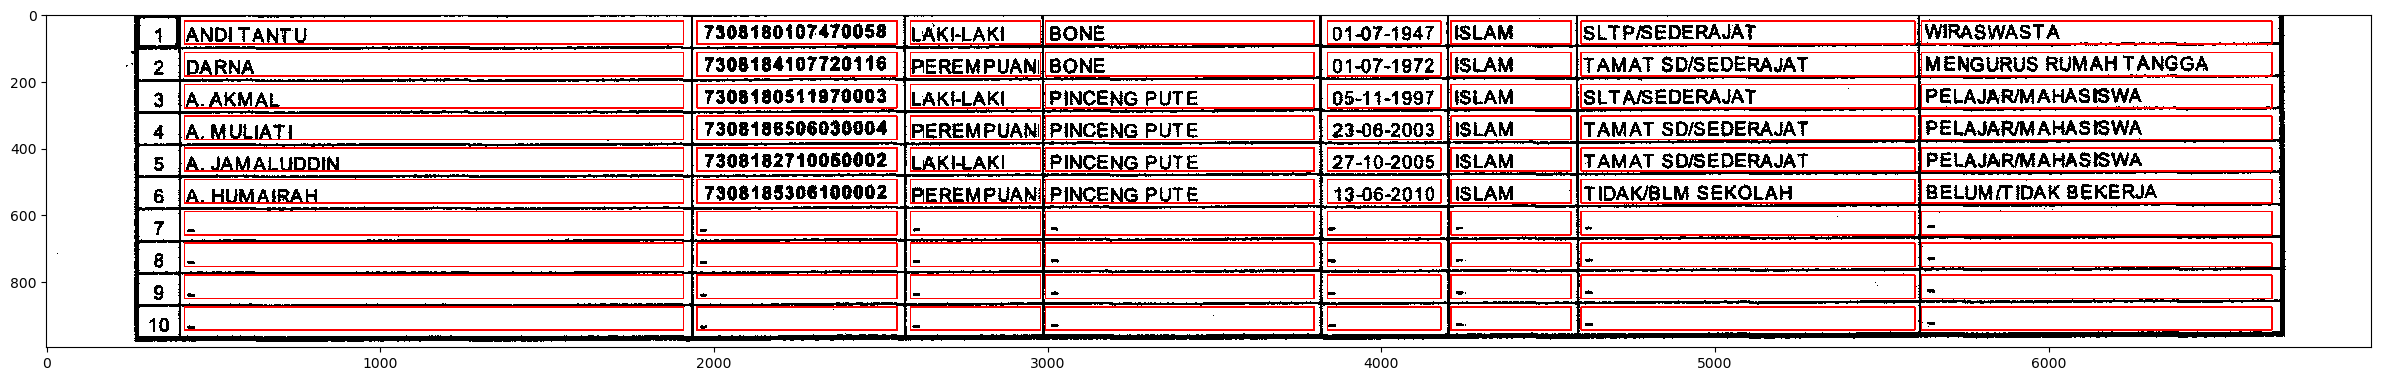

In [65]:
c2_draw = c2.copy()

# x1, x2, y1, y2
c2_coords = [(415, 1910, 20, 90), (1950, 2550, 20, 90), (2590, 2980, 20, 90), (2995, 3800, 20, 90), (3840, 4180, 20, 90), (4210, 4570, 20, 90), (4600, 5600, 20, 90), (5620, 6670, 20, 90),
             (415, 1910, 115, 185), (1950, 2550, 115, 185), (2590, 2980, 115, 185), (2995, 3800, 115, 185), (3840, 4180, 115, 185), (4210, 4570, 115, 185), (4600, 5600, 115, 185), (5620, 6670, 115, 185),
             (415, 1910, 210, 280), (1950, 2550, 210, 280), (2590, 2980, 210, 280), (2995, 3800, 210, 280), (3840, 4180, 210, 280), (4210, 4570, 210, 280), (4600, 5600, 210, 280), (5620, 6670, 210, 280),
             (415, 1910, 305, 375), (1950, 2550, 305, 375), (2590, 2980, 305, 375), (2995, 3800, 305, 375), (3840, 4180, 305, 375), (4210, 4570, 305, 375), (4600, 5600, 305, 375), (5620, 6670, 305, 375),
             (415, 1910, 400, 470), (1950, 2550, 400, 470), (2590, 2980, 400, 470), (2995, 3800, 400, 470), (3840, 4180, 400, 470), (4210, 4570, 400, 470), (4600, 5600, 400, 470), (5620, 6670, 400, 470),
             (415, 1910, 495, 565), (1950, 2550, 495, 565), (2590, 2980, 495, 565), (2995, 3800, 495, 565), (3840, 4180, 495, 565), (4210, 4570, 495, 565), (4600, 5600, 495, 565), (5620, 6670, 495, 565),
             (415, 1910, 590, 660), (1950, 2550, 590, 660), (2590, 2980, 590, 660), (2995, 3800, 590, 660), (3840, 4180, 590, 660), (4210, 4570, 590, 660), (4600, 5600, 590, 660), (5620, 6670, 590, 660),
             (415, 1910, 685, 755), (1950, 2550, 685, 755), (2590, 2980, 685, 755), (2995, 3800, 685, 755), (3840, 4180, 685, 755), (4210, 4570, 685, 755), (4600, 5600, 685, 755), (5620, 6670, 685, 755),
             (415, 1910, 780, 850), (1950, 2550, 780, 850), (2590, 2980, 780, 850), (2995, 3800, 780, 850), (3840, 4180, 780, 850), (4210, 4570, 780, 850), (4600, 5600, 780, 850), (5620, 6670, 780, 850),
             (415, 1910, 875, 945), (1950, 2550, 875, 945), (2590, 2980, 875, 945), (2995, 3800, 875, 945), (3840, 4180, 875, 945), (4210, 4570, 875, 945), (4600, 5600, 875, 945), (5620, 6670, 875, 945)]

for c in c2_coords:
    # texts.append(model(c2[c[2]:c[3], c[0]:c[1]]))
    cv2.rectangle(c2_draw, (c[0], c[2]), (c[1], c[3]), (255, 0, 0), 3)


plt.figure(figsize=(30, 8))
plt.imshow(c2_draw, cmap="gray")

In [67]:
c3 = cv2.cvtColor(c3, cv2.COLOR_GRAY2BGR)

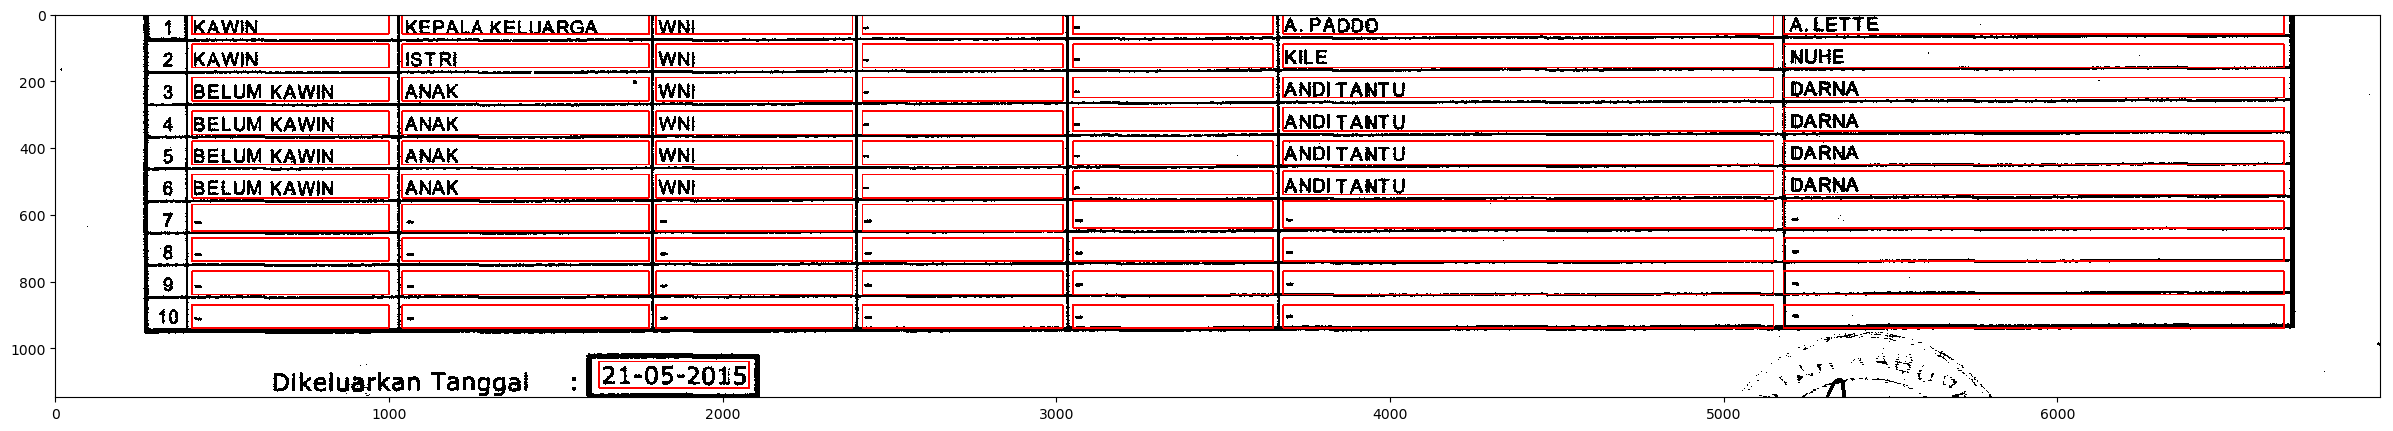

In [126]:
c3_draw = c3.copy()

# x1, x2, y1, y2
c3_coords = [(410, 1000, 0, 60), (1040, 1780, 0, 60), (1800, 2390, 0, 60), (2420, 3020, 0, 60), (3050, 3650, 0, 60), (3680, 5150, 0, 60), (5180, 6680, 0, 60),
             (410, 1000, 90, 160), (1040, 1780, 90, 160), (1800, 2390, 90, 160), (2420, 3020, 90, 160), (3050, 3650, 90, 160), (3680, 5150, 90, 160), (5180, 6680, 90, 160),
             (410, 1000, 190, 260), (1040, 1780, 190, 260), (1800, 2390, 190, 260), (2420, 3020, 190, 260), (3050, 3650, 190, 250), (3680, 5150, 190, 250), (5180, 6680, 190, 250),
             (410, 1000, 290, 360), (1040, 1780, 290, 360), (1800, 2390, 290, 360), (2420, 3020, 290, 360), (3050, 3650, 280, 350), (3680, 5150, 280, 350), (5180, 6680, 280, 350),
             (410, 1000, 380, 450), (1040, 1780, 380, 450), (1800, 2390, 380, 450), (2420, 3020, 380, 450), (3050, 3650, 380, 450), (3680, 5150, 380, 450), (5180, 6680, 380, 450),
             (410, 1000, 480, 550), (1040, 1780, 480, 550), (1800, 2390, 480, 550), (2420, 3020, 480, 550), (3050, 3650, 470, 540), (3680, 5150, 470, 540), (5180, 6680, 470, 540),
             (410, 1000, 570, 650), (1040, 1780, 570, 650), (1800, 2390, 570, 650), (2420, 3020, 570, 650), (3050, 3650, 560, 640), (3680, 5150, 560, 640), (5180, 6680, 560, 640),
             (410, 1000, 670, 740), (1040, 1780, 670, 740), (1800, 2390, 670, 740), (2420, 3020, 670, 740), (3050, 3650, 670, 740), (3680, 5150, 670, 740), (5180, 6680, 670, 740),
             (410, 1000, 770, 840), (1040, 1780, 770, 840), (1800, 2390, 770, 840), (2420, 3020, 770, 840), (3050, 3650, 770, 840), (3680, 5150, 770, 840), (5180, 6680, 770, 840),
             (410, 1000, 870, 940), (1040, 1780, 870, 940), (1800, 2390, 870, 940), (2420, 3020, 870, 940), (3050, 3650, 860, 930), (3680, 5150, 860, 930), (5180, 6680, 860, 930),
             (1630, 2080, 1040, 1120)]

for c in c3_coords:
    # texts.append(model(c2[c[2]:c[3], c[0]:c[1]]))
    cv2.rectangle(c3_draw, (c[0], c[2]), (c[1], c[3]), (255, 0, 0), 3)


plt.figure(figsize=(30, 8))
plt.imshow(c3_draw, cmap="gray")